#                                          Reading Data

In [15]:
import pandas as pd
import numpy as np

In [16]:
df=pd.read_csv(r"C:\Users\91876\OneDrive\Desktop\Big D project.xlsx - Sheet1.csv",index_col='DATE',parse_dates=True)

In [17]:
df=df.dropna()
print('Shape of data',df.shape)
df
     

Shape of data (1821, 5)


MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2014-01-01     33.0     46.0     40.0      657    1756
2014-02-01     35.0     50.0     43.0      657    1756
2014-03-01     36.0     45.0     41.0      657    1757
2014-04-01     32.0     41.0     37.0      658    1757
2014-05-01     24.0     38.0     31.0      658    1758
...             ...      ...      ...      ...     ...
2018-12-26     35.0     45.0     40.0      654    1752
2018-12-27     33.0     44.0     39.0      655    1752
2018-12-28     33.0     47.0     40.0      655    1753
2018-12-29     36.0     47.0     42.0      655    1753
2018-12-30     39.0     52.0     46.0      656    1754

[1821 rows x 5 columns]

#                                         Plot Your Data

<AxesSubplot:xlabel='DATE'>

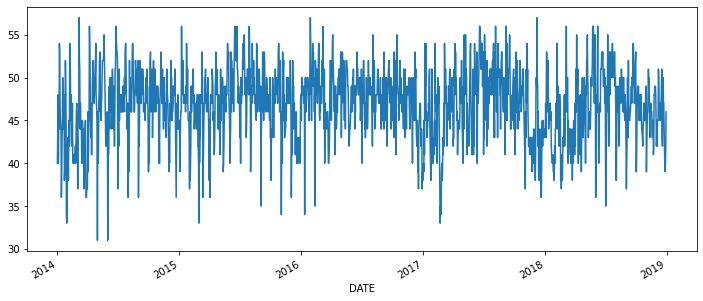

In [18]:
df['AvgTemp'].plot(figsize=(12,5))

#                                  Check For Stationarity

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

#                        Figure Out Order for ARIMA Model

In [20]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068785
2. P-Value :  8.675937480199322e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [21]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
     

In [22]:
stepwise_fit = auto_arima(df['AvgTemp'],suppress_warnings=True)           
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.873
Date:                Fri, 09 Dec 2022   AIC                           8295.746
Time:                        22:39:01   BIC                           8339.803
Sample:                             0   HQIC                          8312.000
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3331      0.387      3.445      0.001       0.575       2.092
ar.L1          0.9713      0.008    116.560      0.000       0.955       0.988
ma.L1         -0.1321      0.024     -5.539      0.000      -0.179      -0.085
ma.L2         -0.2199      0.024     -9.028      0.000      -0.268      -0.172
ma.L3         -0.1997      0.024     -8.279      0.000      -0.247      -0.152
ma.L4         -0.1276      0.023     -5.575      0.000      -0.172      -0.083
ma.L5         -0.0471      0.024     -1.931      0.053      -0.095       0.001
sigma2         5.5007      0.172     31.930      0.000       5.163       5.838
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                21.15
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from statsmodels.tsa.arima_model import ARIMA

#                         Split Data into Training and Testing

In [24]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-01-12 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


#                                          Train the Model

In [25]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['AvgTemp'],order=(1,0,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Fri, 09 Dec 2022   AIC                           8156.395
Time:                        22:39:48   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#                            Make Predictions on Test Set

<AxesSubplot:>

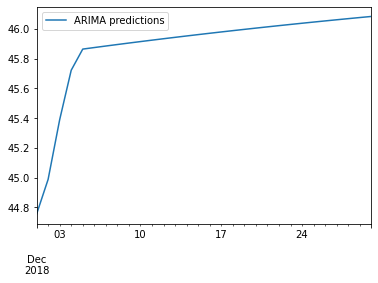

In [26]:
start=len(train)
end=len(train)+len(test)-1
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates
pred.plot(legend=True)

In [27]:
test['AvgTemp'].mean()

45.0

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463991008354


In [29]:
model2=sm.tsa.arima.ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2018-12-26     35.0     45.0     40.0      654    1752
2018-12-27     33.0     44.0     39.0      655    1752
2018-12-28     33.0     47.0     40.0      655    1753
2018-12-29     36.0     47.0     42.0      655    1753
2018-12-30     39.0     52.0     46.0      656    1754

#                                            For Future Dates

In [30]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,5),legend=True)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136667
2019-01-05    45.156141
2019-01-06    45.175342
2019-01-07    45.194275
2019-01-08    45.212943
2019-01-09    45.231350
2019-01-10    45.249499
2019-01-11    45.267395
2019-01-12    45.285040
2019-01-13    45.302438
2019-01-14    45.319592
2019-01-15    45.336507
2019-01-16    45.353185
2019-01-17    45.369630
2019-01-18    45.385844
2019-01-19    45.401832
2019-01-20    45.417595
2019-01-21    45.433139
2019-01-22    45.448465
2019-01-23    45.463576
2019-01-24    45.478476
2019-01-25    45.493167
2019-01-26    45.507653
2019-01-27    45.521937
2019-01-28    45.536020
2019-01-29    45.549906
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>